### 1 NumPy介绍
### 2 ndarray简介
*n维数组类型*，描述了*相同类型*的“items”的集合
一个ndarray对象更重要的属性是：

ndarray.ndim
数组的轴数（维度）。

ndarray.shape
数组的维度。这是一个整数元组，指示每个维度中数组的大小。对于具有n行m列的矩阵，shape将为(n,m)。shape因此元组的长度 是轴的数量，ndim。

ndarray.size
数组的元素总数。这等于shape元素的乘积。

ndarray.dtype
描述数组中元素类型的对象。可以使用标准 Python 类型创建或指定 dtype。此外 NumPy 提供了它自己的类型。numpy.int32、numpy.int16 和 numpy.float64 是一些示例。

ndarray.itemsize
数组每个元素的大小（以字节为单位）。例如，类型元素的数组float64有itemsize8 个（=64/8），而一个类型的元素complex32有itemsize4 个（=32/8）。它相当于ndarray.dtype.itemsize。

ndarray.data
包含数组实际元素的缓冲区。通常，我们不需要使用此属性，因为我们将使用索引工具访问数组中的元素。

In [1]:
import numpy as np
# 创建
score=np.array([
    [80,89,86,67,79],
    [78,97,89,67,81]
])

In [2]:
score

array([[80, 89, 86, 67, 79],
       [78, 97, 89, 67, 81]])

In [3]:
a=np.arange(15).reshape(3,5)

In [4]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [5]:
a.shape

(3, 5)

In [6]:
a.ndim


2

In [7]:
a.size


15

In [8]:
a.dtype


dtype('int32')

In [9]:
a.itemsize


4

In [10]:
a.dtype.itemsize


4

In [11]:
a.data

### 3 效率对比

In [12]:
import random
import time
import numpy as np
a=[]
for i in range(100000000):
    a.append(random.random())
#通过%time魔法方法查看运行一行代码所需时间
%time sum1=sum(a)

b=np.array(a)
%time sum2=np.sum(b)

Wall time: 1.19 s
Wall time: 172 ms


可以看出numpy的效率更高
ndarray和原生python有什么不同？
![compare](imgs/compare.png)
从图中我们可以看出ndarray在存储数据的时候，数据与数据的地址都是连续的，这样就给使得批量操作数组元素时速度更快。

*1 内存块风格*
这是因为ndarray中的所有元素的类型都是相同的，而Python列表中的元素类型是任意的，所以ndarray在存储元素时内存可以连续，而python原生list就只能通过寻址方式找到下一个元素，这虽然也导致了在通用性能方面Numpy的ndarray不及Python原生list，但在科学计算中，Numpy的ndarray就可以省掉很多循环语句，代码使用方面比Python原生list简单的多。
*2 ndarray支持并行化运算（向量化运算）*
numpy内置了并行运算功能，当系统有多个核心时，做某种计算时，numpy会自动做并行计算

*3 效率远高于纯Python代码*
Numpy底层使用C语言编写，内部解除了GIL（全局解释器锁），其对数组的操作速度不受Python解释器的限制，所以，其效率远高于纯Python代码。

### 4 生成数组的方法
#### 4.1 生成0和1的数组

In [13]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [14]:
ones=np.ones((2,3,4))
ones

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [15]:
np.zeros_like(ones)

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

#### 4.2 从现有数组生成


In [16]:
a=np.array([[1,2,3],[4,5,6]])
a1=np.array(a)

In [17]:
a1

array([[1, 2, 3],
       [4, 5, 6]])

In [18]:
a2=np.asarray(a)
a2

array([[1, 2, 3],
       [4, 5, 6]])

In [19]:
a[0,0]=100
a

array([[100,   2,   3],
       [  4,   5,   6]])

In [20]:
a1

array([[1, 2, 3],
       [4, 5, 6]])

In [21]:
a2

array([[100,   2,   3],
       [  4,   5,   6]])

*深拷贝（复制，改源文件复制的文件不发生变化）浅拷贝（创建快捷方式，改源文件快捷方式也变化）
a1未变化，a2变化；a1（array）深拷贝，a2(asarray)浅拷贝*

#### 4.3 生成固定范围的数组

In [22]:
np.linspace(0,100,11)#生成等差数列

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [23]:
np.arange(10,50,2)

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48])

In [24]:
np.logspace(0,2,3)#log10,从10的0次方到10的2次方生成三个数

array([  1.,  10., 100.])

#### 4.4 生成随机数组
##### 4.4.1 生成均匀分布的数组
```
np.random.uniform(low=,high=,size=None)#low下届，high上界
np.random.rand()
np.random.randint(low=,high=,size=None)
```

In [25]:
#np.random.rand
np.random.rand(2,3)

array([[0.03888063, 0.84477729, 0.91499517],
       [0.2945753 , 0.51271086, 0.22256759]])

In [26]:
np.random.uniform(low=1,high=10,size=(3,5))

array([[8.97480875, 2.76943811, 6.13564735, 5.52211783, 4.48648383],
       [5.95950782, 2.46723009, 2.3522721 , 8.11031008, 3.12013273],
       [2.57390384, 5.09422421, 8.47084234, 5.29865066, 4.12003383]])

In [27]:
np.random.randint(low=1,high=10,size=(3,5))

array([[4, 7, 6, 9, 7],
       [7, 9, 9, 9, 2],
       [7, 9, 2, 1, 3]])

##### 4.4.2 绘图，均匀分布的数组
![uniform](imgs/uniform.png)

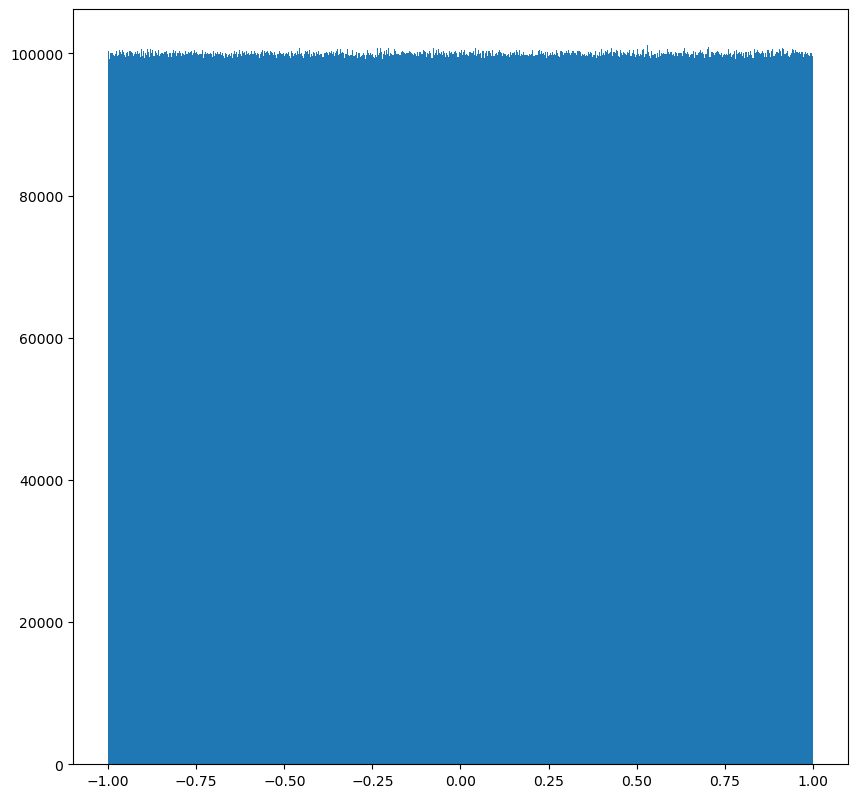

In [28]:
x1=np.random.uniform(-1,1,100000000)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10),dpi=100)
plt.hist(x=x1,bins=1000)
plt.show()

##### 4.4.3 生成正态分布的数组
*基础概念复习*
![normal](imgs/normal.png)
1.均值$\mu$

2.标准差/方差$\sigma$
$$s^2=\frac{(x_1-M)^2+(x_2-M)^2+(x_3-M)^2+...+(x_N-M)^2}{N}$$
$s^2$为整体方差，M为平均值，n为数据总个数
$$\sigma=\sqrt[2]{\frac{\sum_{i=1}^N{(x_i-M)^2}}{N}}$$
正态分布概率公式：
$$f(x)=\frac{e^{-\frac{(x-\mu)^2}{2\sigma^2}}}{\sigma\sqrt[]{2\pi}}$$
*！如何在markdown中插入数学公式？*
https://www.jianshu.com/p/a0aa94ef8ab2


*方差值越小，表示数据越集中；反之，则数据越分散*
```
np.random.randn(n)#标准正态分布中返回n个值
np.random.normal(loc=0.0,scale=1.0,size=None)#loc:此概率的均值，scale:此概率分布的标准差（对应宽度），size：输出的shape，默认是一个
np.random.standard_normal(size=None)#返回指定形状的正态分布数组
```

In [29]:
np.random.randn(2)

array([-1.85795129, -0.73310112])

In [30]:
x2=np.random.normal(loc=1.75,scale=1.0,size=100000000)
#如果数组太大而无法打印，NumPy 会自动跳过数组的中心部分，只打印角落：
#np.set_printoptions(threshold=5) #控制输出的值的个数为6，其余以...代替
#np.set_printoptions(threshold=np.nan) #控制台输出所有的值，不需要省略号

In [31]:
x2=np.random.normal(loc=1.75,scale=1.0,size=10000)
np.set_printoptions(threshold=10000)
x2

array([ 7.18987330e-01,  2.48031391e+00,  2.07430657e-01,  1.91610561e+00,
        1.46260522e+00,  2.06214667e+00,  8.95315835e-01,  1.45532638e+00,
        1.46923145e+00,  2.18288087e+00,  2.81893666e+00,  1.08813533e+00,
        3.00754084e+00,  2.01335458e+00,  2.59520480e+00,  1.66931660e+00,
        3.08668525e+00,  1.69425156e+00,  2.25840281e+00,  1.98167334e+00,
        1.67717397e+00,  6.30490252e-01,  2.09163106e+00, -8.81482775e-03,
        2.21058552e+00,  2.03020402e+00,  3.15776362e+00,  2.30356699e+00,
        2.07460202e+00,  1.67469549e+00,  1.78870651e+00,  4.08522074e+00,
        8.90955888e-01,  6.58228516e-01, -3.44148118e-01,  2.03460199e+00,
        1.13621920e+00,  1.14656265e+00,  7.47037024e-01,  1.50568518e+00,
        1.94000863e+00,  1.94295573e+00,  1.25834467e+00,  1.72433000e+00,
        2.70325044e+00,  2.21580682e+00,  7.46627495e-01, -6.72571432e-02,
        2.57414378e+00,  3.78726239e+00,  1.22886469e-01,  2.16549448e+00,
        1.79232525e+00,  

In [32]:
np.random.standard_normal(size=(2,2))

array([[-2.0029244 , -0.51575023],
       [-0.09349079,  0.22921268]])

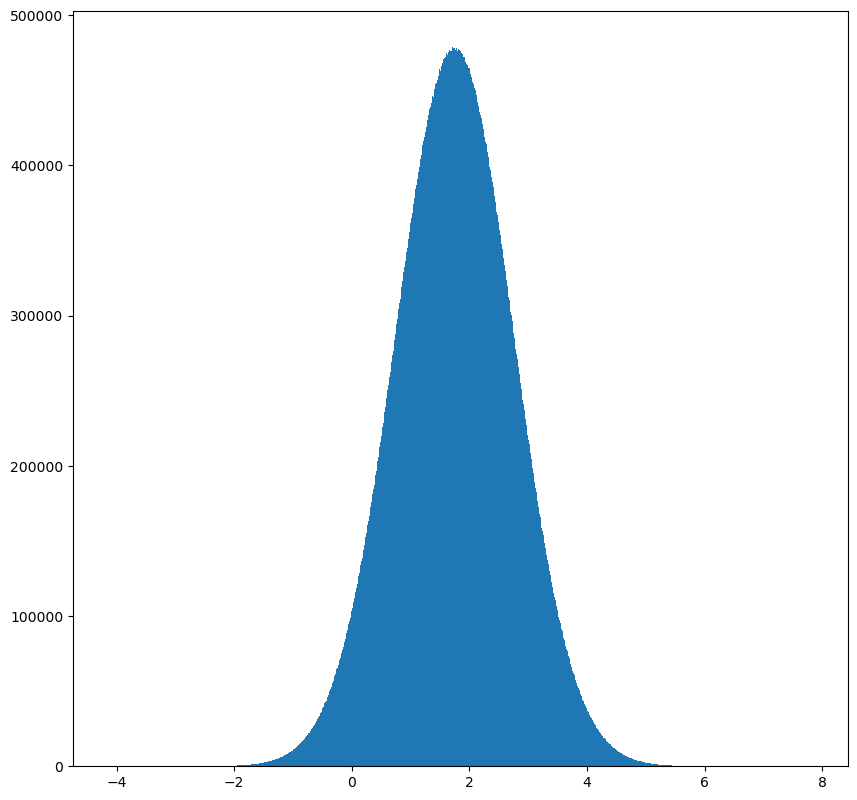

In [33]:
x2=np.random.normal(loc=1.75,scale=1.0,size=100000000)
plt.figure(figsize=(10,10),dpi=100)
plt.hist(x=x2,bins=1000)
plt.show()

### 5 数组的索引、切片

In [34]:
#
stock_change=np.random.normal(0,1,(8,10))
stock_change

array([[ 0.35563805, -0.57551305, -1.35414135, -0.63580099,  0.64676027,
        -2.4921136 ,  1.70984476,  0.0094096 , -0.59572403, -0.65237252],
       [-1.01629114,  0.50694966,  0.46168683,  1.38752235, -0.20542201,
        -2.16780536,  0.40510697, -0.91878666,  0.95638481,  1.04049612],
       [-0.2461895 ,  0.4727082 , -0.89248393,  0.55636809, -0.96737673,
        -0.48578777,  0.64770581,  0.46587343,  0.25066043,  0.274426  ],
       [ 0.47698822,  0.11626794,  0.71477415,  1.60774029,  0.9709961 ,
         0.48690154,  0.41345529,  0.61174589,  1.2875013 , -1.11247215],
       [ 0.68698782,  1.16680617,  0.85497171,  0.14003586,  0.75232263,
         1.31461376, -0.53962997,  0.01526627, -1.23674991, -0.29925207],
       [-0.80977336, -0.77793957,  0.13141015, -1.28545012,  1.65885629,
         1.57051555,  0.93011954, -0.03612155,  1.20343834, -0.14275079],
       [ 1.44659993,  0.65808033, -0.27100662, -1.17482462, -0.48684137,
        -0.48257439,  0.36906396,  0.94922442

In [35]:
#获取第一行前三列
stock_change[0,0:3]

array([ 0.35563805, -0.57551305, -1.35414135])

In [36]:
stock_change[0:2,0:3]
#前两行，前三列

array([[ 0.35563805, -0.57551305, -1.35414135],
       [-1.01629114,  0.50694966,  0.46168683]])

In [37]:
a1=np.array([[[1,2,3],[4,5,6]],[[12,3,34],[5,6,7]]])
a1

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[12,  3, 34],
        [ 5,  6,  7]]])

In [38]:
a1[0,1,0]

4

In [39]:
a1[1,0,0]

12

In [40]:
a1[0,0,2]

3

### 6 形状修改
1..reshape()
2..resize()
3..T

In [41]:
stock_change=np.random.normal(0,1,(4,5))
stock_change

array([[-0.24590642, -0.04811207, -1.84790152, -0.41255587,  0.42934316],
       [ 0.09719373,  1.36410677,  0.63963089, -0.43124228,  0.2610679 ],
       [-0.0831259 , -0.87069598,  0.87841446,  1.17697388, -0.37025048],
       [ 0.71630399,  1.77072643,  0.10927366, -0.17765527,  0.77582328]])

In [42]:
stock_change.reshape(5,4)#不进行行列互换，产生新变量

array([[-0.24590642, -0.04811207, -1.84790152, -0.41255587],
       [ 0.42934316,  0.09719373,  1.36410677,  0.63963089],
       [-0.43124228,  0.2610679 , -0.0831259 , -0.87069598],
       [ 0.87841446,  1.17697388, -0.37025048,  0.71630399],
       [ 1.77072643,  0.10927366, -0.17765527,  0.77582328]])

In [43]:
stock_change.reshape(-1,10)#(-1,n)表示一个[]里有n个数

array([[-0.24590642, -0.04811207, -1.84790152, -0.41255587,  0.42934316,
         0.09719373,  1.36410677,  0.63963089, -0.43124228,  0.2610679 ],
       [-0.0831259 , -0.87069598,  0.87841446,  1.17697388, -0.37025048,
         0.71630399,  1.77072643,  0.10927366, -0.17765527,  0.77582328]])

In [44]:
stock_change

array([[-0.24590642, -0.04811207, -1.84790152, -0.41255587,  0.42934316],
       [ 0.09719373,  1.36410677,  0.63963089, -0.43124228,  0.2610679 ],
       [-0.0831259 , -0.87069598,  0.87841446,  1.17697388, -0.37025048],
       [ 0.71630399,  1.77072643,  0.10927366, -0.17765527,  0.77582328]])

In [45]:
stock_change.resize(5,4)
#进行行列互换后再对原值进行更改

In [46]:
stock_change

array([[-0.24590642, -0.04811207, -1.84790152, -0.41255587],
       [ 0.42934316,  0.09719373,  1.36410677,  0.63963089],
       [-0.43124228,  0.2610679 , -0.0831259 , -0.87069598],
       [ 0.87841446,  1.17697388, -0.37025048,  0.71630399],
       [ 1.77072643,  0.10927366, -0.17765527,  0.77582328]])

In [47]:
stock_change.T#行列互换

array([[-0.24590642,  0.42934316, -0.43124228,  0.87841446,  1.77072643],
       [-0.04811207,  0.09719373,  0.2610679 ,  1.17697388,  0.10927366],
       [-1.84790152,  1.36410677, -0.0831259 , -0.37025048, -0.17765527],
       [-0.41255587,  0.63963089, -0.87069598,  0.71630399,  0.77582328]])

### 7 类型修改

In [48]:
stock_change

array([[-0.24590642, -0.04811207, -1.84790152, -0.41255587],
       [ 0.42934316,  0.09719373,  1.36410677,  0.63963089],
       [-0.43124228,  0.2610679 , -0.0831259 , -0.87069598],
       [ 0.87841446,  1.17697388, -0.37025048,  0.71630399],
       [ 1.77072643,  0.10927366, -0.17765527,  0.77582328]])

In [49]:
stock_change.astype(np.int32)

array([[ 0,  0, -1,  0],
       [ 0,  0,  1,  0],
       [ 0,  0,  0,  0],
       [ 0,  1,  0,  0],
       [ 1,  0,  0,  0]])

In [50]:
arr=np.array([[[1,2,3],[4,5,6]],[[12,3,34],[5,6,7]]])
arr.tostring()

<ipython-input-50-ca096041f4e6>:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  arr.tostring()


b'\x01\x00\x00\x00\x02\x00\x00\x00\x03\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00\x06\x00\x00\x00\x0c\x00\x00\x00\x03\x00\x00\x00"\x00\x00\x00\x05\x00\x00\x00\x06\x00\x00\x00\x07\x00\x00\x00'

### 8 数组去重

In [51]:
temp=np.array([[1,2,3,4],[3,6,2,8]])
np.unique(temp)

array([1, 2, 3, 4, 6, 8])

In [52]:
#temp2=np.array([[1,2,3,4],[3,6,2]])
#np.unique(temp2)
#这样是不行的

### 9 ndarray运算
#### 9.1 逻辑运算

In [53]:
stock_change=np.random.normal(0,1,(8,10))
stock_change

array([[-0.87947598, -1.01408841, -1.69056493, -0.84415523,  1.44444657,
        -0.41508793,  1.11521105,  1.31149775,  1.62086347,  0.72718296],
       [ 0.79040682, -0.1578337 ,  0.45219963,  0.29279018,  0.37126698,
        -1.94153109,  0.54510792, -1.13942028, -0.99159791, -0.74107723],
       [ 0.01776119,  0.42323466,  0.9775266 ,  0.60532859, -0.71500109,
        -2.1925368 , -0.28267491,  1.66444572,  0.07673865,  0.52027938],
       [ 1.18178296, -2.2842049 ,  0.35078627,  2.58980362,  1.04021635,
        -0.62675888,  0.04874275,  1.69074818,  0.42003078,  0.93351149],
       [-0.94398748,  0.11100619, -0.44188907,  0.38064843, -1.49000853,
        -0.66837325, -0.83352376,  0.07090264,  0.1983174 ,  0.25505338],
       [ 1.40905676, -0.82122738,  0.59224245, -1.64558299, -1.17365956,
        -1.87022859, -1.54004051,  1.41065934, -0.47659303, -0.57351736],
       [-0.09556106,  0.02471312, -0.11358277,  0.30368908,  0.14543794,
        -0.37446802, -1.8438913 , -1.78266686

In [54]:
stock_c=stock_change[0:5,0:5]
stock_c

array([[-0.87947598, -1.01408841, -1.69056493, -0.84415523,  1.44444657],
       [ 0.79040682, -0.1578337 ,  0.45219963,  0.29279018,  0.37126698],
       [ 0.01776119,  0.42323466,  0.9775266 ,  0.60532859, -0.71500109],
       [ 1.18178296, -2.2842049 ,  0.35078627,  2.58980362,  1.04021635],
       [-0.94398748,  0.11100619, -0.44188907,  0.38064843, -1.49000853]])

In [55]:
stock_c>1

array([[False, False, False, False,  True],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [ True, False, False,  True,  True],
       [False, False, False, False, False]])

In [56]:
stock_c[stock_c>1]=2

In [57]:
stock_c

array([[-0.87947598, -1.01408841, -1.69056493, -0.84415523,  2.        ],
       [ 0.79040682, -0.1578337 ,  0.45219963,  0.29279018,  0.37126698],
       [ 0.01776119,  0.42323466,  0.9775266 ,  0.60532859, -0.71500109],
       [ 2.        , -2.2842049 ,  0.35078627,  2.        ,  2.        ],
       [-0.94398748,  0.11100619, -0.44188907,  0.38064843, -1.49000853]])

In [58]:
#test_a=[1,2,3]
#test_a>2
#需要注意列表无法进行该项运算

TypeError: '>' not supported between instances of 'list' and 'int'

#### 9.2 通用判断函数

In [59]:
stock_c

array([[-0.87947598, -1.01408841, -1.69056493, -0.84415523,  2.        ],
       [ 0.79040682, -0.1578337 ,  0.45219963,  0.29279018,  0.37126698],
       [ 0.01776119,  0.42323466,  0.9775266 ,  0.60532859, -0.71500109],
       [ 2.        , -2.2842049 ,  0.35078627,  2.        ,  2.        ],
       [-0.94398748,  0.11100619, -0.44188907,  0.38064843, -1.49000853]])

In [61]:
stock_d=stock_change[0:2,0:5]

In [62]:
stock_d

array([[-0.87947598, -1.01408841, -1.69056493, -0.84415523,  2.        ],
       [ 0.79040682, -0.1578337 ,  0.45219963,  0.29279018,  0.37126698]])

In [66]:
np.all(stock_d>0)#有一个不满足->False

False

In [65]:
np.any(stock_d>0)#有一个满足就是True

True

#### 9.3 np.where

In [68]:
temp=stock_change[::4,::4]
temp

array([[-0.87947598,  2.        ,  1.62086347],
       [-0.94398748, -1.49000853,  0.1983174 ]])

In [69]:
np.where(temp>0,1,0)#三元运算符相当于“？ ：”

array([[0, 1, 1],
       [0, 0, 1]])

In [71]:
np.where(np.logical_and(temp>0.5,temp<1),1,0)


array([[0, 0, 0],
       [0, 0, 0]])

In [72]:
np.where(np.logical_or(temp>0.5,temp<-0.5),1,0)

array([[1, 1, 1],
       [1, 1, 0]])

#### 9.4 统计运算

如果想知道涨幅或跌幅最大的数据应该怎么做？

##### 9.4.1 统计指标
```
min()
max()
median()
mean()
std()标准差
var()方差

```
##### 9.4.2 案例：股票涨跌幅统计运算

In [73]:
stock_change.max()#求全局的最大值

2.487474069148083

In [74]:
stock_change.max(axis=0)#求每列的最大值

array([ 2.        ,  0.42323466,  0.9775266 ,  2.        ,  2.        ,
       -0.37446802,  1.11521105,  1.69074818,  2.48747407,  1.13197227])

In [75]:
stock_change.max(axis=1)#求每行的最大值

array([2.        , 0.79040682, 1.66444572, 2.        , 0.38064843,
       1.41065934, 0.91707142, 2.48747407])

```
np.argmin(temp,axis=)
np.argmax(temp,axis=)#求最大值下标
```

In [76]:
stock_c

array([[-0.87947598, -1.01408841, -1.69056493, -0.84415523,  2.        ],
       [ 0.79040682, -0.1578337 ,  0.45219963,  0.29279018,  0.37126698],
       [ 0.01776119,  0.42323466,  0.9775266 ,  0.60532859, -0.71500109],
       [ 2.        , -2.2842049 ,  0.35078627,  2.        ,  2.        ],
       [-0.94398748,  0.11100619, -0.44188907,  0.38064843, -1.49000853]])

In [78]:
stock_c.argmax()

4

### 10 矩阵和向量
略

### 11 数组间运算

矩阵乘法遵循*广播机制*:
1.维度相等
2.shape(其中一个为一)
如图
![broad](imgs/broad.png)

In [83]:
arr1=np.array([1,2,3])
arr2=np.array([1,2,3],[1,3,3])
arr1*arr2

TypeError: Field elements must be 2- or 3-tuples, got '1'

#### 11.1 矩阵乘法
```
np.matmul
np.dot
```

In [84]:
a=np.array([[80,86],
           [82,80],
           [85,78],
           [90,90],
           [86,82],
           [78,80],
           [82,90],
           [92,94]
           ])
b=np.array([[0.7],[0.3]])

In [85]:
np.matmul(a,b)

array([[81.8],
       [81.4],
       [82.9],
       [90. ],
       [84.8],
       [78.6],
       [84.4],
       [92.6]])

In [86]:
np.dot(a,b)

array([[81.8],
       [81.4],
       [82.9],
       [90. ],
       [84.8],
       [78.6],
       [84.4],
       [92.6]])

In [87]:
np.dot(a,10)

array([[800, 860],
       [820, 800],
       [850, 780],
       [900, 900],
       [860, 820],
       [780, 800],
       [820, 900],
       [920, 940]])

In [88]:
np.matmul(a,10)#不支持矩阵和数字的相乘

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)